# Proyek Analisis Data: Bike Sharing Dataset 
- **Nama:** Frederikus Felix Bintang Setyawan
- **Email:** bintangsetyawan13@gmail.com
- **ID Dicoding:** MC006D5Y1429

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda bervariasi berdasarkan musim, waktu dalam sehari, dan tipe hari (hari kerja vs akhir pekan), serta bagaimana komposisi pengguna (kasual vs terdaftar) berubah di berbagai kondisi temporal tersebut?
- Bagaimana berbagai kondisi cuaca (termasuk suhu, kelembaban, kecepatan angin, dan kondisi cuaca umum) mempengaruhi pola peminjaman sepeda, dan apakah terdapat perbedaan sensitivitas terhadap faktor cuaca antara pengguna kasual dan terdaftar serta pada berbagai waktu dan musim?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import re

# Mengabaikan warning
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
plt.style.use('ggplot')
sns.set(style='whitegrid')

## Data Wrangling

### Gathering Data

In [2]:
# Membaca data
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

In [3]:
# Melihat beberapa data awal dari dataset day
print("Day dataset (first 5 rows):")
display(day_df.head())

Day dataset (first 5 rows):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Melihat beberapa data awal dari dataset hour
print("\nHour dataset (first 5 rows):")
display(hour_df.head())


Hour dataset (first 5 rows):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Melihat dimensi data
print(f"\nDay dataset dimensions: {day_df.shape}")
print(f"Hour dataset dimensions: {hour_df.shape}")


Day dataset dimensions: (731, 16)
Hour dataset dimensions: (17379, 17)


**Insight:**
- Dataset day berisi 731 baris dengan 16 kolom, mencakup data harian selama 2 tahun
- Dataset hour berisi 17379 baris dengan 17 kolom, memberikan granularitas per jam
- Dataset hour memiliki kolom tambahan 'hr' yang tidak ada di dataset day
- Dataset hour menyediakan detail yang lebih tinggi untuk analisis pola penggunaan berdasarkan waktu dalam sehari

### Assessing Data

In [6]:
# Memeriksa informasi dataset day
print("Informasi dataset day:")
day_df.info()

Informasi dataset day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Memeriksa informasi dataset hour
print("\nInformasi dataset hour:")
hour_df.info()


Informasi dataset hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
# Memeriksa statistik deskriptif day
print("\nStatistik deskriptif dataset day:")
display(day_df.describe())


Statistik deskriptif dataset day:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Memeriksa statistik deskriptif hour
print("\nStatistik deskriptif dataset hour:")
display(hour_df.describe())


Statistik deskriptif dataset hour:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kita dapat melihat tipe data dari setiap kolom, membantu mengidentifikasi kolom yang perlu dikonversi
- Kolom tanggal (dteday) disimpan sebagai string dan perlu dikonversi ke datetime
- Beberapa kolom numerik seperti temp, atemp, hum, dan windspeed tampaknya dinormalisasi (nilai antara 0-1)
- Statistik deskriptif menunjukkan rentang nilai untuk setiap kolom, membantu mengidentifikasi outlier

In [10]:
# Memeriksa nilai yang hilang
print("\nMissing values in day dataset:")
day_missing = day_df.isnull().sum()
print(day_missing[day_missing > 0] if day_missing.any() else "No missing values")


Missing values in day dataset:
No missing values


In [11]:
print("\nMissing values in hour dataset:")
hour_missing = hour_df.isnull().sum()
print(hour_missing[hour_missing > 0] if hour_missing.any() else "No missing values")


Missing values in hour dataset:
No missing values


In [12]:
# Memeriksa duplikasi data
print(f"\nDuplicates in day dataset: {day_df.duplicated().sum()}")
print(f"Duplicates in hour dataset: {hour_df.duplicated().sum()}")


Duplicates in day dataset: 0
Duplicates in hour dataset: 0


**Insight:**
- Tidak ada nilai yang hilang di kedua dataset, yang merupakan hal positif
- Tidak ada duplikasi data, sehingga tidak perlu menghapus data duplikat
- Data yang lengkap dan unik akan memudahkan analisis selanjutnya

### Cleaning Data

In [13]:
# 1. Mengkonversi kolom dteday ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [14]:
# Memeriksa range tanggal untuk memastikan tidak ada gap
print("\nRange tanggal pada day_df:", day_df['dteday'].min(), "sampai", day_df['dteday'].max())
print("Range tanggal pada hour_df:", hour_df['dteday'].min(), "sampai", hour_df['dteday'].max())


Range tanggal pada day_df: 2011-01-01 00:00:00 sampai 2012-12-31 00:00:00
Range tanggal pada hour_df: 2011-01-01 00:00:00 sampai 2012-12-31 00:00:00


In [15]:
# Periksa jumlah hari unik di kedua dataset
print("Jumlah hari unik di day_df:", day_df['dteday'].nunique())
print("Jumlah hari unik di hour_df:", hour_df['dteday'].nunique())

Jumlah hari unik di day_df: 731
Jumlah hari unik di hour_df: 731


In [16]:
# Pastikan semua tanggal di day_df juga ada di hour_df
days_in_day_df = set(day_df['dteday'].dt.date)
days_in_hour_df = set(hour_df['dteday'].dt.date)
missing_days = days_in_day_df - days_in_hour_df
if missing_days:
    print(f"Ada {len(missing_days)} hari di day_df yang tidak ada di hour_df")
    print("Contoh hari yang hilang:", list(sorted(missing_days))[:5])

**Insight:**
- Mengkonversi kolom tanggal ke format datetime sangat penting untuk analisis temporal
- Dengan memeriksa rentang tanggal, kita dapat mengidentifikasi adanya gap dalam data
- Membandingkan hari yang ada di kedua dataset membantu mengidentifikasi ketidakkonsistenan
- Jika ada tanggal yang hanya ada di satu dataset, ini bisa menyebabkan masalah saat melakukan merge

In [17]:
# 2. Membuat kolom datetime yang menggabungkan tanggal dan jam untuk dataset hour
hour_df['datetime'] = hour_df.apply(
    lambda row: row['dteday'] + timedelta(hours=int(row['hr'])), 
    axis=1
)

In [18]:
# 3. Membuat kolom tanggal dan waktu yang lebih detail
# Untuk day_df
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['day'] = day_df['dteday'].dt.day
day_df['month_name'] = day_df['dteday'].dt.month_name()
day_df['day_name'] = day_df['dteday'].dt.day_name()
day_df['quarter'] = day_df['dteday'].dt.quarter
day_df['is_month_start'] = day_df['dteday'].dt.is_month_start
day_df['is_month_end'] = day_df['dteday'].dt.is_month_end

In [19]:
# Untuk hour_df
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['day'] = hour_df['dteday'].dt.day
hour_df['month_name'] = hour_df['dteday'].dt.month_name()
hour_df['day_name'] = hour_df['dteday'].dt.day_name()
hour_df['quarter'] = hour_df['dteday'].dt.quarter
hour_df['hour_of_day'] = hour_df['hr']
hour_df['is_rush_hour_morning'] = ((hour_df['hr'] >= 7) & (hour_df['hr'] <= 9)).astype(int)
hour_df['is_rush_hour_evening'] = ((hour_df['hr'] >= 16) & (hour_df['hr'] <= 19)).astype(int)
hour_df['is_night'] = ((hour_df['hr'] >= 22) | (hour_df['hr'] <= 5)).astype(int)

**Insight:**
- Membuat kolom datetime yang menggabungkan tanggal dan jam memudahkan analisis time series
- Ekstraksi komponen waktu (tahun, bulan, hari, dll.) memungkinkan analisis musiman dan tren
- Fitur turunan seperti 'is_rush_hour' dapat membantu mengidentifikasi pola penggunaan sepeda
- Mengidentifikasi waktu khusus (pagi, sore, malam) sangat berguna untuk analisis perilaku pengguna

In [20]:
# 4. Memetakan nilai numerik ke kategori
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice/Snow'
}
yr_mapping = {0: '2011', 1: '2012'}
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
    4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}
workingday_mapping = {0: 'Weekend/Holiday', 1: 'Working Day'}
holiday_mapping = {0: 'No Holiday', 1: 'Holiday'}

In [21]:
# Menerapkan mapping untuk day_df
day_df['season_label'] = day_df['season'].map(season_mapping)
day_df['weathersit_label'] = day_df['weathersit'].map(weather_mapping)
day_df['yr_label'] = day_df['yr'].map(yr_mapping)
day_df['weekday_label'] = day_df['weekday'].map(weekday_mapping)
day_df['workingday_label'] = day_df['workingday'].map(workingday_mapping)
day_df['holiday_label'] = day_df['holiday'].map(holiday_mapping)

In [22]:
# Menerapkan mapping untuk hour_df
hour_df['season_label'] = hour_df['season'].map(season_mapping)
hour_df['weathersit_label'] = hour_df['weathersit'].map(weather_mapping)
hour_df['yr_label'] = hour_df['yr'].map(yr_mapping)
hour_df['weekday_label'] = hour_df['weekday'].map(weekday_mapping)
hour_df['workingday_label'] = hour_df['workingday'].map(workingday_mapping)
hour_df['holiday_label'] = hour_df['holiday'].map(holiday_mapping)

**Insight:**
- Mengubah kode numerik menjadi label kategori meningkatkan interpretabilitas data
- Label yang bermakna (seperti 'Spring' daripada '1') memudahkan analisis dan visualisasi
- Pemetaan yang konsisten antara dataset day dan hour memastikan analisis yang selaras
- Kategori seperti cuaca dan hari kerja sangat relevan untuk pola penggunaan sepeda

In [23]:
# 5. Konversi nilai normalisasi ke nilai asli
# Untuk day_df
day_df['temp_actual'] = day_df['temp'] * 47 - 8  # t_min = -8, t_max = 39
day_df['atemp_actual'] = day_df['atemp'] * 66 - 16  # t_min = -16, t_max = 50
day_df['hum_actual'] = day_df['hum'] * 100  # dalam persentase
day_df['windspeed_actual'] = day_df['windspeed'] * 67  # dalam km/h

In [24]:
# Untuk hour_df
hour_df['temp_actual'] = hour_df['temp'] * 47 - 8
hour_df['atemp_actual'] = hour_df['atemp'] * 66 - 16
hour_df['hum_actual'] = hour_df['hum'] * 100
hour_df['windspeed_actual'] = hour_df['windspeed'] * 67

**Insight:**
- Nilai yang dinormalisasi (0-1) sulit diinterpretasi dalam konteks dunia nyata
- Mengkonversi ke unit yang sebenarnya (°C, %, km/h) memudahkan pemahaman dan analisis
- Nilai asli memungkinkan perbandingan dengan data eksternal atau standar meteorologi
- Memahami rentang nilai sebenarnya membantu mengidentifikasi kondisi ekstrem yang mungkin memengaruhi penggunaan sepeda

In [25]:
# 6. Membuat fitur tambahan berdasarkan data yang ada
# Untuk day_df
day_df['temp_feels_diff'] = day_df['temp_actual'] - day_df['atemp_actual']
day_df['casual_ratio'] = day_df['casual'] / day_df['cnt']
day_df['registered_ratio'] = day_df['registered'] / day_df['cnt']
day_df['temp_category'] = pd.cut(
    day_df['temp_actual'], 
    bins=[-10, 0, 10, 20, 30, 40], 
    labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']
)
day_df['hum_category'] = pd.cut(
    day_df['hum_actual'], 
    bins=[0, 25, 50, 75, 100], 
    labels=['Low', 'Medium', 'High', 'Very High']
)
day_df['windspeed_category'] = pd.cut(
    day_df['windspeed_actual'], 
    bins=[0, 15, 30, 45, 70], 
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [26]:
# Untuk hour_df
hour_df['temp_feels_diff'] = hour_df['temp_actual'] - hour_df['atemp_actual']
hour_df['casual_ratio'] = hour_df['casual'] / hour_df['cnt']
hour_df['registered_ratio'] = hour_df['registered'] / hour_df['cnt']
hour_df['temp_category'] = pd.cut(
    hour_df['temp_actual'], 
    bins=[-10, 0, 10, 20, 30, 40], 
    labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']
)
hour_df['hum_category'] = pd.cut(
    hour_df['hum_actual'], 
    bins=[0, 25, 50, 75, 100], 
    labels=['Low', 'Medium', 'High', 'Very High']
)
hour_df['windspeed_category'] = pd.cut(
    hour_df['windspeed_actual'], 
    bins=[0, 15, 30, 45, 70], 
    labels=['Low', 'Medium', 'High', 'Very High']
)
hour_df['time_of_day'] = pd.cut(
    hour_df['hr'], 
    bins=[-1, 5, 11, 17, 23], 
    labels=['Night', 'Morning', 'Afternoon', 'Evening']
)

**Insight:**
- Fitur turunan seperti perbedaan suhu terasa vs aktual dapat menjelaskan faktor kenyamanan
- Rasio pengguna casual vs registered membantu memahami segmentasi pengguna
- Kategorisasi variabel numerik memudahkan analisis dan visualisasi
- Pengelompokan waktu hari (pagi, siang, malam) membantu mengidentifikasi pola penggunaan
- Fitur-fitur baru ini dapat mengungkapkan pola dan hubungan yang tidak terlihat dari data mentah

In [27]:
# 7. Mengganti infinity values dengan NaN
day_df.replace([np.inf, -np.inf], np.nan, inplace=True)
hour_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Mengkonversi kolom kategorikal ke tipe data yang sesuai sebelum mengisi NaN
for col in day_df.select_dtypes(include='category').columns:
    # Mengkonversi ke tipe data asli (biasanya string atau numerik)
    day_df[col] = day_df[col].astype(str)
    
for col in hour_df.select_dtypes(include='category').columns:
    hour_df[col] = hour_df[col].astype(str)

# Sekarang bisa mengisi NaN dengan aman
day_df.fillna(0, inplace=True)
hour_df.fillna(0, inplace=True)

**Insight:**
- Operasi pembagian (seperti pada rasio) dapat menghasilkan nilai infinity jika pembagi adalah nol
- Mengganti nilai infinity dengan NaN dan kemudian mengisinya dengan nilai yang sesuai mencegah error
- Mengkonversi kolom kategori ke string sebelum mengisi NaN mencegah error tipe data
- Penanganan NaN yang tepat memastikan analisis yang akurat dan mencegah error pada tahap berikutnya

In [28]:
# 8. Melakukan merge antara day_df dan hour_df 

# Pertama, periksa apakah ada perbedaan dalam jumlah hari
print("\nMemeriksa perbedaan jumlah hari antara day_df dan hour_df...")
days_only_in_day = days_in_day_df - days_in_hour_df
days_only_in_hour = days_in_hour_df - days_in_day_df

if days_only_in_day:
    print(f"Hari yang hanya ada di day_df: {len(days_only_in_day)}")
    print(f"Contoh: {sorted(list(days_only_in_day))[:5]}")
    
if days_only_in_hour:
    print(f"Hari yang hanya ada di hour_df: {len(days_only_in_hour)}")
    print(f"Contoh: {sorted(list(days_only_in_hour))[:5]}")

# Melakukan merge dengan hati-hati
print("\nMelakukan merge data...")
# Menggunakan left join untuk memastikan semua data hour tetap ada
merged_df = hour_df.copy()

# Menambahkan kolom dari day_df yang tidak ada di hour_df
day_specific_cols = [col for col in day_df.columns if col not in hour_df.columns]
if day_specific_cols:
    # Gunakan merge dengan parameter how='left' untuk mempertahankan semua data hour
    day_temp = day_df[['dteday'] + day_specific_cols]
    merged_df = pd.merge(merged_df, day_temp, on='dteday', how='left')

# Periksa apakah ada tanggal yang hilang setelah merge
print(f"Jumlah baris setelah merge: {len(merged_df)}")
print(f"Jumlah hari unik setelah merge: {merged_df['dteday'].nunique()}")
print(f"Range tanggal setelah merge: {merged_df['dteday'].min()} sampai {merged_df['dteday'].max()}")


Memeriksa perbedaan jumlah hari antara day_df dan hour_df...

Melakukan merge data...
Jumlah baris setelah merge: 17379
Jumlah hari unik setelah merge: 731
Range tanggal setelah merge: 2011-01-01 00:00:00 sampai 2012-12-31 00:00:00


**Insight:**
- Penting untuk memeriksa perbedaan hari antara kedua dataset sebelum melakukan merge
- Menggunakan left join memastikan bahwa semua data hour tetap dipertahankan
- Hanya menambahkan kolom yang tidak ada di hour_df mencegah duplikasi kolom
- Pemeriksaan setelah merge membantu memastikan bahwa tidak ada data yang hilang
- Strategi merge yang tepat sangat penting untuk menghindari gap data (seperti antara Juli 2011 dan Maret 2012)

In [29]:
# 9. Menambahkan kolom untuk tren dan seasonality
merged_df['day_of_year'] = merged_df['dteday'].dt.dayofyear
merged_df['is_weekend'] = merged_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

In [30]:
# 10. Menghitung metrik tambahan
# Menggunakan transform untuk menghindari kesalahan pada groupby
merged_df['hourly_to_daily_casual_ratio'] = merged_df.groupby('dteday')['casual'].transform(
    lambda x: x / x.sum() if x.sum() > 0 else 0
)
merged_df['hourly_to_daily_registered_ratio'] = merged_df.groupby('dteday')['registered'].transform(
    lambda x: x / x.sum() if x.sum() > 0 else 0
)
merged_df['hourly_to_daily_cnt_ratio'] = merged_df.groupby('dteday')['cnt'].transform(
    lambda x: x / x.sum() if x.sum() > 0 else 0
)

# 11. Menambahkan flag untuk kondisi ekstrem
merged_df['is_extreme_temp'] = ((merged_df['temp_actual'] < 0) | (merged_df['temp_actual'] > 35)).astype(int)
merged_df['is_extreme_humidity'] = (merged_df['hum_actual'] > 90).astype(int)
merged_df['is_extreme_windspeed'] = (merged_df['windspeed_actual'] > 40).astype(int)

**Insight:**
- Fitur hari dalam tahun (day_of_year) membantu mengidentifikasi pola musiman
- Flag untuk akhir pekan memudahkan analisis perbedaan pola penggunaan antara hari kerja dan akhir pekan
- Rasio per jam terhadap total harian menunjukkan distribusi penggunaan sepeda sepanjang hari
- Flag untuk kondisi cuaca ekstrem membantu menganalisis dampak cuaca buruk terhadap penggunaan sepeda
- Fitur-fitur ini memperkaya dataset untuk analisis yang lebih mendalam dan pemodelan prediktif

In [31]:
# Periksa dan tangani nilai NaN yang mungkin muncul setelah operasi
print(f"\nJumlah nilai NaN setelah semua operasi: {merged_df.isna().sum().sum()}")
merged_df.fillna(0, inplace=True)

# 12. Menyimpan hasil cleaning ke dalam file CSV
merged_df.to_csv('main_data.csv', index=False)
print("Data telah dibersihkan, dimerge, dan disimpan ke main_data.csv")

# Periksa keberhasilan penyimpanan
print(f"Jumlah baris dalam file CSV yang disimpan: {merged_df.shape[0]}")
print(f"Jumlah hari unik dalam file CSV yang disimpan: {merged_df['dteday'].nunique()}")


Jumlah nilai NaN setelah semua operasi: 0
Data telah dibersihkan, dimerge, dan disimpan ke main_data.csv
Jumlah baris dalam file CSV yang disimpan: 17379
Jumlah hari unik dalam file CSV yang disimpan: 731


**Insight:**
- Pemeriksaan nilai NaN setelah semua operasi penting untuk memastikan kualitas data
- Mengisi nilai NaN dengan 0 atau nilai yang sesuai mencegah masalah dalam analisis selanjutnya
- Menyimpan hasil ke CSV memudahkan akses dan penggunaan data di masa mendatang
- Pemeriksaan akhir jumlah baris dan hari unik memastikan bahwa data yang disimpan lengkap
- Kualitas data yang baik adalah fondasi untuk analisis dan visualisasi yang akurat

## Exploratory Data Analysis (EDA)

### Eksplorasi Data Dasar

In [34]:
clean_df = pd.read_csv('dashboard/main_data.csv')
clean_df['dteday'] = pd.to_datetime(clean_df['dteday'])
clean_df['datetime'] = pd.to_datetime(clean_df['datetime'])

In [35]:
# Melihat sampel data dari dataset harian
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,temp_actual,atemp_actual,hum_actual,windspeed_actual,temp_feels_diff,casual_ratio,registered_ratio,temp_category,hum_category,windspeed_category
653,654,2012-10-15,4,1,10,0,1,1,2,0.561667,...,18.398349,19.583900,70.7500,19.834479,-1.185551,0.129362,0.870638,Mild,High,Medium
489,490,2012-05-04,2,1,5,0,5,1,1,0.627500,...,21.492500,23.000522,73.5417,10.916846,-1.508022,0.169790,0.830210,Warm,High,Low
221,222,2011-08-10,3,0,8,0,3,1,1,0.766667,...,28.033349,29.208878,42.4167,13.417286,-1.175529,0.184937,0.815063,Warm,Medium,Low
422,423,2012-02-27,1,1,2,0,1,1,1,0.366667,...,9.233349,7.624964,49.0833,17.958211,1.608385,0.058538,0.941462,Cold,Medium,Medium
717,718,2012-12-18,4,1,12,0,2,1,1,0.410833,...,11.309151,11.040728,66.6250,14.834068,0.268423,0.077920,0.922080,Mild,High,Low


**Insight:**
- Dataset harian berisi informasi agregat peminjaman sepeda per hari
- Mencakup berbagai variabel seperti tanggal, musim, suhu, dan jumlah peminjaman

In [36]:
# Melihat sampel data dari dataset per jam
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp_actual,hum_actual,windspeed_actual,temp_feels_diff,casual_ratio,registered_ratio,temp_category,hum_category,windspeed_category,time_of_day
13858,13859,2012-08-05,3,1,8,15,0,0,0,1,...,38.0012,37.0,35.0008,-3.7012,0.364444,0.635556,Hot,Medium,High,Afternoon
16487,16488,2012-11-24,4,1,11,17,0,6,0,1,...,-0.9982,41.0,26.0027,5.2182,0.230159,0.769841,Cold,Medium,Medium,Afternoon
255,256,2011-01-12,1,0,1,0,0,3,1,2,...,-2.9980,86.0,6.0032,2.5180,0.000000,1.000000,Very Cold,Very High,Low,Night
11459,11460,2012-04-27,2,1,4,16,0,5,1,1,...,17.0000,29.0,16.9979,-0.5600,0.238636,0.761364,Mild,Medium,Medium,Afternoon
1105,1106,2011-02-18,1,0,2,19,0,5,1,1,...,24.9992,29.0,39.0007,-3.8592,0.098765,0.901235,Warm,Medium,High,Evening


**Insight:**
- Dataset per jam memberikan detail lebih granular tentang peminjaman sepeda
- Memungkinkan analisis pola dalam satu hari yang tidak terlihat di dataset harian

In [37]:
# Statistik deskriptif untuk dataset harian
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,temp_actual,atemp_actual,hum_actual,windspeed_actual,temp_feels_diff,casual_ratio,registered_ratio,temp_category,hum_category,windspeed_category
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,...,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Warm,High,Low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,436,512
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,...,15.283085,15.307363,62.789406,12.762576,-0.024278,0.175598,0.824402,NaN,NaN,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,-5.220871,-10.781406,0.000000,1.500244,-8.235486,0.013177,0.489676,NaN,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,...,7.842925,6.297605,52.000000,9.041650,-1.547050,0.099321,0.785196,NaN,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,...,15.421651,16.124378,62.666700,12.125325,-0.494827,0.148784,0.851216,NaN,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,...,22.804575,24.167732,73.020850,15.625371,1.497856,0.214804,0.900679,NaN,NaN,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,32.498349,39.499136,97.250000,34.000021,25.998251,0.510324,0.986823,NaN,NaN,NaN


**Insight:**
- Terdapat variasi yang signifikan dalam jumlah peminjaman sepeda (cnt) antar hari
- Rata-rata peminjaman harian sekitar 4,500 dengan standar deviasi yang cukup tinggi
- Kondisi cuaca dan suhu menunjukkan variasi yang mencerminkan perubahan musiman

In [38]:
# Statistik deskriptif untuk dataset per jam
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp_actual,hum_actual,windspeed_actual,temp_feels_diff,casual_ratio,registered_ratio,temp_category,hum_category,windspeed_category,time_of_day
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Warm,High,Low,Afternoon
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5801,7022,8132,4375
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,15.401157,62.722884,12.736540,-0.042760,0.172143,0.827857,NaN,NaN,NaN,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-16.000000,0.000000,0.000000,-12.880000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,5.997800,48.000000,7.001500,-1.859400,0.063492,0.746269,NaN,NaN,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,15.996800,63.000000,12.998000,-0.377000,0.146893,0.853107,NaN,NaN,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,24.999200,78.000000,16.997900,1.250200,0.253731,0.936508,NaN,NaN,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,...,50.000000,100.000000,56.996900,32.421600,1.000000,1.000000,NaN,NaN,NaN,NaN


**Insight:**
- Rata-rata peminjaman per jam sekitar 189 dengan variasi yang tinggi
- Pola per jam menunjukkan fluktuasi yang lebih besar dibandingkan data harian
- Distribusi peminjaman casual vs registered menunjukkan bahwa pengguna terdaftar mendominasi

In [39]:
# Memeriksa keunikan instant ID
print(f"Apakah instant ID unik di dataset harian?: {day_df.instant.is_unique}")
print(f"Apakah instant ID unik di dataset per jam?: {hour_df.instant.is_unique}")

Apakah instant ID unik di dataset harian?: True
Apakah instant ID unik di dataset per jam?: True


**Insight:**
- Mengkonfirmasi bahwa ID instant bersifat unik di masing-masing dataset
- Penting untuk memastikan tidak ada duplikasi data yang dapat mempengaruhi analisis

In [40]:
# Memeriksa duplikasi tanggal
duplicate_dates_day = day_df.duplicated(subset=['dteday']).sum()
duplicate_dates_hour = hour_df.duplicated(subset=['dteday', 'hr']).sum()
print(f"Duplikasi tanggal di dataset harian: {duplicate_dates_day}")
print(f"Duplikasi tanggal dan jam di dataset per jam: {duplicate_dates_hour}")

Duplikasi tanggal di dataset harian: 0
Duplikasi tanggal dan jam di dataset per jam: 0


**Insight:**
- Tidak ada duplikasi tanggal di dataset harian, setiap hari hanya muncul sekali
- Tidak ada duplikasi kombinasi tanggal dan jam di dataset per jam, memastikan integritas data

### Analisis Tren Waktu

In [41]:
# Analisis tren peminjaman sepeda berdasarkan musim
seasonal_rentals = day_df.groupby('season_label').agg({
    'cnt': ['mean', 'min', 'max', 'sum'],
    'casual': 'sum',
    'registered': 'sum'
})
seasonal_rentals

cnt                       casual registered
                     mean   min   max      sum     sum        sum
season_label                                                     
Fall          5644.303191  1115  8714  1061129  226091     835038
Spring        2604.132597   431  7836   471348   60622     410726
Summer        4992.331522   795  8362   918589  203522     715067
Winter        4728.162921    22  8555   841613  129782     711831

**Insight:**
- Musim memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda
- Musim panas dan musim gugur menunjukkan jumlah peminjaman tertinggi
- Musim dingin memiliki jumlah peminjaman terendah, kemungkinan karena kondisi cuaca

In [42]:
# Analisis tren peminjaman berdasarkan bulan
monthly_rentals = day_df.groupby('month_name').agg({
    'cnt': ['mean', 'min', 'max', 'sum'],
    'casual': 'sum',
    'registered': 'sum'
}).sort_values(by=('cnt', 'sum'), ascending=False)
monthly_rentals

cnt                     casual registered
                   mean   min   max     sum    sum        sum
month_name                                                   
August      5664.419355  1115  7865  351194  72039     279155
June        5772.366667  3767  8120  346342  73906     272436
September   5766.516667  1842  8714  345991  70323     275668
July        5563.677419  3285  8173  344948  78157     266791
May         5349.774194  2633  8294  331686  75285     256401
October     5199.225806    22  8156  322352  59760     262592
April       4484.900000   795  7460  269094  60802     208292
November    4247.183333  1495  6852  254831  36603     218228
March       3692.258065   605  8362  228920  44444     184476
December    3403.806452   441  6606  211036  21693     189343
February    2655.298246  1005  5062  151352  14963     136389
January     2176.338710   431  4521  134933  12042     122891

**Insight:**
- Bulan-bulan musim panas (Juni-September) menunjukkan jumlah peminjaman tertinggi
- Bulan-bulan musim dingin (Desember-Februari) memiliki jumlah peminjaman terendah
- Pola ini konsisten dengan analisis musiman sebelumnya

In [43]:
# Analisis tren peminjaman berdasarkan hari dalam seminggu
weekday_rentals = day_df.groupby('weekday_label').agg({
    'cnt': ['mean', 'min', 'max', 'sum'],
    'casual': 'sum',
    'registered': 'sum'
})
weekday_rentals

cnt                      casual registered
                      mean   min   max     sum     sum        sum
weekday_label                                                    
Friday         4690.288462  1167  8362  487790   78238     409552
Monday         4338.123810    22  7525  455503   70784     384719
Saturday       4550.542857   627  8714  477807  153852     323955
Sunday         4228.828571   605  8227  444027  140521     303506
Thursday       4667.259615   431  7804  485395   61460     423935
Tuesday        4510.663462   683  7767  469109   57843     411266
Wednesday      4548.538462   441  8173  473048   57319     415729

**Insight:**
- Terdapat perbedaan pola peminjaman antara hari kerja dan akhir pekan
- Hari kerja memiliki jumlah peminjaman yang lebih tinggi, terutama dari pengguna terdaftar
- Akhir pekan menunjukkan peningkatan peminjaman dari pengguna kasual

In [44]:
# Analisis tren peminjaman berdasarkan jam dalam sehari
hourly_rentals = hour_df.groupby('hr').agg({
    'cnt': ['mean', 'min', 'max', 'sum'],
    'casual': 'sum',
    'registered': 'sum'
})
hourly_rentals

cnt                  casual registered
          mean min  max     sum    sum        sum
hr                                               
0    53.898072   2  283   39130   7375      31755
1    33.375691   1  168   24164   4709      19455
2    22.869930   1  132   16352   3412      12940
3    11.727403   1   79    8174   1893       6281
4     6.352941   1   28    4428    874       3554
5    19.889819   1   66   14261   1012      13249
6    76.044138   1  213   55132   3017      52115
7   212.064649   1  596  154171   8037     146134
8   359.011004   5  839  261001  15761     245240
9   219.309491  14  426  159438  22458     136980
10  173.668501   8  539  126257  33789      92468
11  208.143054  10  663  151320  43286     108034
12  253.315934   3  776  184414  49718     134696
13  253.661180  11  760  184919  52713     132206
14  240.949246  12  750  175652  55089     120563
15  251.233196   7  750  183149  54606     128543
16  311.983562  11  783  227748  53834     173914
17  461.452055  15  976  336860  54220     282640
18  425.510989  23  977  309772  44496     265276
19  311.523352  11  743  226789  35505     191284
20  226.030220  11  567  164550  26378     138172
21  172.314560   6  584  125445  20570     104875
22  131.335165   9  502   95612  16200      79412
23   87.831044   2  256   63941  11065      52876

**Insight:**
- Terdapat dua puncak peminjaman yang jelas: pagi (7-9) dan sore (17-19)
- Pola ini mengindikasikan penggunaan sepeda untuk perjalanan komuter
- Peminjaman terendah terjadi pada dini hari (1-5), saat kebanyakan orang tidur

### Analisis Faktor Cuaca

In [45]:
# Analisis pengaruh kondisi cuaca terhadap peminjaman
weather_impact = day_df.groupby('weathersit_label').agg({
    'cnt': ['mean', 'min', 'max', 'sum', 'count'],
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean']
})
weather_impact

cnt                            casual              \
                         mean  min   max      sum count     sum        mean   
weathersit_label                                                              
Clear/Few clouds  4876.786177  431  8714  2257952   463  446346  964.030238   
Light Snow/Rain   1803.285714   22  4639    37869    21    3895  185.476190   
Mist/Cloudy       4035.862348  605  8362   996858   247  169776  687.352227   

                 registered               
                        sum         mean  
weathersit_label                          
Clear/Few clouds    1811606  3912.755940  
Light Snow/Rain       33974  1617.809524  
Mist/Cloudy          827082  3348.510121

**Insight:**
- Kondisi cuaca memiliki dampak signifikan pada jumlah peminjaman sepeda
- Cuaca cerah/berawan ringan memiliki jumlah peminjaman tertinggi
- Hujan/salju berat menunjukkan penurunan drastis dalam peminjaman
- Pengguna kasual lebih terpengaruh oleh cuaca buruk dibandingkan pengguna terdaftar

In [46]:
# Analisis pengaruh suhu terhadap peminjaman
day_df.groupby('temp_category').agg({
    'cnt': ['mean', 'min', 'max', 'sum', 'count'],
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean']
})

cnt                             casual               \
                      mean   min   max      sum count     sum         mean   
temp_category                                                                
Cold           2991.473214   431  5992   670090   224   83600   373.214286   
Hot            4804.000000  3285  6786    57648    12   12494  1041.166667   
Mild           4869.778261    22  8555  1120049   230  212957   925.900000   
Very Cold      1508.687500   822  2368    24139    16    1464    91.500000   
Warm           5705.835341  1115  8714  1420753   249  309502  1242.979920   

              registered               
                     sum         mean  
temp_category                          
Cold              586490  2618.258929  
Hot                45154  3762.833333  
Mild              907092  3943.878261  
Very Cold          22675  1417.187500  
Warm             1111251  4462.855422

**Insight:**
- Suhu memiliki korelasi positif dengan jumlah peminjaman sepeda
- Kategori suhu "Warm" (20-30°C) menunjukkan jumlah peminjaman tertinggi
- Kategori "Very Cold" (<0°C) memiliki jumlah peminjaman terendah
- Pengguna kasual lebih sensitif terhadap perubahan suhu dibandingkan pengguna terdaftar

In [47]:
# Analisis pengaruh kelembaban terhadap peminjaman
day_df.groupby('hum_category').agg({
    'cnt': ['mean', 'min', 'max', 'sum', 'count'],
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean']
})

cnt                             casual              \
                     mean   min   max      sum count     sum        mean   
hum_category                                                               
High          4867.672018   431  8714  2122305   436  404992  928.880734   
Low           1635.000000  1635  1635     1635     1     532  532.000000   
Medium        4299.041379   822  8294   623361   145  119527  824.324138   
Very High     3680.777027    22  7836   544755   148   94920  641.351351   
nan            623.000000   623   623      623     1      46   46.000000   

             registered               
                    sum         mean  
hum_category                          
High            1717313  3938.791284  
Low                1103  1103.000000  
Medium           503834  3474.717241  
Very High        449835  3039.425676  
nan                 577   577.000000

**Insight:**
- Kelembaban memiliki hubungan terbalik dengan jumlah peminjaman sepeda
- Kelembaban rendah hingga sedang (0-50%) menunjukkan jumlah peminjaman tertinggi
- Kelembaban sangat tinggi (>75%) berhubungan dengan penurunan peminjaman
- Pengguna kasual lebih terpengaruh oleh kelembaban tinggi dibandingkan pengguna terdaftar

In [48]:
# Analisis pengaruh kecepatan angin terhadap peminjaman
day_df.groupby('windspeed_category').agg({
    'cnt': ['mean', 'min', 'max', 'sum', 'count'],
    'casual': ['sum', 'mean'],
    'registered': ['sum', 'mean']
})

cnt                             casual  \
                           mean   min   max      sum count     sum   
windspeed_category                                                   
High                1635.000000  1635  1635     1635     1     532   
Low                 4709.748047   431  8362  2411391   512  458576   
Medium              4035.105505    22  8714   879653   218  160909   

                               registered               
                          mean        sum         mean  
windspeed_category                                      
High                532.000000       1103  1103.000000  
Low                 895.656250    1952815  3814.091797  
Medium              738.114679     718744  3296.990826

**Insight:**
- Kecepatan angin memiliki dampak moderat pada jumlah peminjaman sepeda
- Kecepatan angin rendah hingga sedang (0-30 km/h) lebih disukai untuk bersepeda
- Kecepatan angin sangat tinggi (>45 km/h) berhubungan dengan penurunan peminjaman
- Pengaruh kecepatan angin tidak sekuat suhu atau kondisi cuaca

### Analisis Pola Pengguna

In [49]:
# Perbandingan pengguna kasual vs terdaftar berdasarkan hari
day_type_comparison = day_df.groupby('workingday_label').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})
day_type_comparison['casual_percentage'] = day_type_comparison['casual'] / day_type_comparison['cnt'] * 100
day_type_comparison['registered_percentage'] = day_type_comparison['registered'] / day_type_comparison['cnt'] * 100
day_type_comparison

,cnt,casual,registered,casual_percentage,registered_percentage
workingday_label,,,,,
Weekend/Holiday,1000269,316732,683537,31.664682,68.335318
Working Day,2292410,303285,1989125,13.229963,86.770037


**Insight:**
- Pengguna terdaftar mendominasi pada hari kerja (>80% dari total peminjaman)
- Pengguna kasual meningkat signifikan pada akhir pekan/libur (>30% dari total peminjaman)
- Pola ini mengindikasikan bahwa pengguna terdaftar cenderung menggunakan sepeda untuk komuter, sementara pengguna kasual untuk rekreasi

In [50]:
# Analisis pola peminjaman per jam berdasarkan tipe hari
hour_day_type = hour_df.groupby(['workingday', 'hr']).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Membuat pivot table untuk visualisasi
hour_day_pivot = hour_day_type.pivot(index='hr', columns='workingday', values='cnt')
hour_day_pivot.columns = ['Weekend/Holiday', 'Working Day']
hour_day_pivot

,Weekend/Holiday,Working Day
hr,,
0,90.800000,36.786290
1,69.508696,16.552632
2,53.171053,8.683778
3,25.775330,4.942553
4,8.264317,5.429787
5,8.689189,24.913131
6,18.742358,102.500000
7,43.406926,290.612903
8,105.653680,477.006048


**Insight:**
- Hari kerja menunjukkan dua puncak yang jelas (pagi dan sore) yang sesuai dengan jam komuter
- Akhir pekan/libur menunjukkan pola yang lebih merata dengan puncak di siang hari
- Perbedaan pola ini menegaskan penggunaan berbeda: komuter vs rekreasi

In [51]:
# Analisis rasio pengguna kasual vs terdaftar berdasarkan musim
seasonal_user_ratio = day_df.groupby('season_label').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})
seasonal_user_ratio['casual_percentage'] = seasonal_user_ratio['casual'] / seasonal_user_ratio['cnt'] * 100
seasonal_user_ratio['registered_percentage'] = seasonal_user_ratio['registered'] / seasonal_user_ratio['cnt'] * 100
seasonal_user_ratio

,cnt,casual,registered,casual_percentage,registered_percentage
season_label,,,,,
Fall,1061129,226091,835038,21.306646,78.693354
Spring,471348,60622,410726,12.861410,87.138590
Summer,918589,203522,715067,22.155937,77.844063
Winter,841613,129782,711831,15.420627,84.579373


**Insight:**
- Persentase pengguna kasual meningkat di musim panas dan musim semi
- Pengguna terdaftar tetap dominan di semua musim, tetapi persentasenya tertinggi di musim dingin
- Pola ini konsisten dengan hipotesis bahwa pengguna kasual lebih dipengaruhi oleh kondisi cuaca

### Analisis Korelasi

In [52]:
# Menghitung korelasi antara variabel numerik dan jumlah peminjaman
correlation_day = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
correlation_day

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


**Insight:**
- Suhu (temp dan atemp) memiliki korelasi positif kuat dengan jumlah peminjaman
- Kelembaban (hum) memiliki korelasi negatif moderat dengan peminjaman
- Kecepatan angin (windspeed) memiliki korelasi negatif lemah dengan peminjaman
- Pengguna kasual lebih dipengaruhi oleh faktor cuaca dibandingkan pengguna terdaftar

In [53]:
# Menganalisis korelasi antara faktor waktu dan peminjaman
hour_df['hour_sin'] = np.sin(2 * np.pi * hour_df.hr/24)
hour_df['hour_cos'] = np.cos(2 * np.pi * hour_df.hr/24)
time_correlation = hour_df[['hr', 'hour_sin', 'hour_cos', 'casual', 'registered', 'cnt']].corr()
time_correlation

,hr,hour_sin,hour_cos,casual,registered,cnt
hr,1.000000,-0.774988,-0.097192,0.301202,0.374141,0.394071
hour_sin,-0.774988,1.000000,-0.003930,-0.377695,-0.368823,-0.410427
hour_cos,-0.097192,-0.003930,1.000000,-0.402863,-0.358251,-0.408447
casual,0.301202,-0.377695,-0.402863,1.000000,0.506618,0.694564
registered,0.374141,-0.368823,-0.358251,0.506618,1.000000,0.972151
cnt,0.394071,-0.410427,-0.408447,0.694564,0.972151,1.000000


**Insight:**
- Transformasi siklus jam menunjukkan korelasi yang lebih kuat dengan peminjaman
- Pola peminjaman mengikuti ritme siklus harian yang dapat dimodelkan dengan fungsi trigonometri
- Pengguna terdaftar dan kasual menunjukkan perbedaan korelasi dengan waktu, mengindikasikan pola penggunaan berbeda

### Analisis Tren Tahunan

In [54]:
# Perbandingan peminjaman antara 2011 dan 2012
yearly_comparison = day_df.groupby('yr_label').agg({
    'cnt': ['mean', 'sum', 'std'],
    'casual': ['mean', 'sum'],
    'registered': ['mean', 'sum']
})
yearly_comparison

cnt                             casual           registered  \
                 mean      sum          std         mean     sum         mean   
yr_label                                                                        
2011      3405.761644  1243103  1378.753666   677.402740  247252  2728.358904   
2012      5599.934426  2049576  1788.667868  1018.483607  372765  4581.450820   

                   
              sum  
yr_label           
2011       995851  
2012      1676811

**Insight:**
- Terdapat peningkatan signifikan dalam jumlah peminjaman dari 2011 ke 2012
- Peningkatan terjadi baik untuk pengguna kasual maupun terdaftar
- Pertumbuhan ini mengindikasikan popularitas yang meningkat atau ekspansi layanan

In [55]:
# Analisis tren bulanan per tahun
monthly_yearly_trend = day_df.groupby(['yr_label', 'month_name']).agg({
    'cnt': 'mean'
}).reset_index()
monthly_yearly_pivot = monthly_yearly_trend.pivot(index='month_name', columns='yr_label', values='cnt')
# Mengurutkan bulan secara kronologis
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_yearly_pivot = monthly_yearly_pivot.reindex(month_order)
monthly_yearly_pivot

yr_label,2011,2012
month_name,,
January,1231.903226,3120.774194
February,1721.964286,3556.448276
March,2065.967742,5318.548387
April,3162.333333,5807.466667
May,4381.322581,6318.225806
June,4783.733333,6761.000000
July,4559.387097,6567.967742
August,4409.387097,6919.451613
September,4247.266667,7285.766667


**Insight:**
- Pola musiman konsisten antara 2011 dan 2012, dengan puncak di musim panas
- 2012 menunjukkan peningkatan peminjaman di semua bulan dibandingkan 2011
- Beberapa bulan menunjukkan peningkatan lebih signifikan, mengindikasikan pertumbuhan tidak merata

### Analisis Segmen Pengguna

In [56]:
# Membandingkan pola peminjaman antara pengguna kasual dan terdaftar
user_type_hourly = hour_df.groupby('hr').agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()
user_type_hourly

,hr,casual,registered
0,0,10.158402,43.739669
1,1,6.504144,26.871547
2,2,4.772028,18.097902
3,3,2.715925,9.011478
4,4,1.253945,5.098996
5,5,1.411437,18.478382
6,6,4.161379,71.882759
7,7,11.055021,201.009629
8,8,21.679505,337.331499
9,9,30.891334,188.418157


**Insight:**
- Pengguna terdaftar menunjukkan pola yang jelas dengan puncak pada jam komuter
- Pengguna kasual memiliki pola yang lebih merata dengan puncak di siang hingga sore hari
- Perbedaan ini menegaskan motivasi penggunaan yang berbeda antara dua jenis pengguna

In [57]:
# Analisis pengaruh hari libur pada segmen pengguna
holiday_impact = day_df.groupby('holiday_label').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})
holiday_impact['casual_percentage'] = holiday_impact['casual'] / holiday_impact['cnt'] * 100
holiday_impact['registered_percentage'] = holiday_impact['registered'] / holiday_impact['cnt'] * 100
holiday_impact

,cnt,casual,registered,casual_percentage,registered_percentage
holiday_label,,,,,
Holiday,3735.000000,1064.714286,2670.285714,28.506407,71.493593
No Holiday,4527.104225,841.771831,3685.332394,18.594046,81.405954


**Insight:**
- Hari libur menunjukkan penurunan total peminjaman dibandingkan hari biasa
- Persentase pengguna kasual meningkat signifikan pada hari libur
- Pengguna terdaftar menunjukkan penurunan drastis pada hari libur, mengkonfirmasi penggunaan untuk komuter

In [58]:
# Analisis pola peminjaman pada kondisi cuaca ekstrem
extreme_weather = day_df[day_df['weathersit'] >= 3].groupby(['yr_label', 'season_label']).agg({
    'cnt': ['mean', 'count'],
    'casual': 'mean',
    'registered': 'mean'
})
extreme_weather

cnt             casual   registered
                              mean count         mean         mean
yr_label season_label                                             
2011     Fall          2182.666667     3   158.333333  2024.333333
         Spring         564.500000     2    40.000000   524.500000
         Summer        1240.000000     2   150.000000  1090.000000
         Winter        1869.375000     8   142.250000  1727.125000
2012     Fall          4459.000000     1  1264.000000  3195.000000
         Spring        1305.000000     2   100.500000  1204.500000
         Summer        1027.000000     1   120.000000   907.000000
         Winter        2330.500000     2   158.500000  2172.000000

**Insight:**
- Cuaca ekstrem menyebabkan penurunan signifikan dalam peminjaman di semua musim
- Pengguna kasual hampir tidak ada selama kondisi cuaca ekstrem
- Pengguna terdaftar lebih tangguh terhadap cuaca buruk, meskipun jumlahnya juga menurun

### Analisis Faktor Gabungan

In [59]:
# Analisis interaksi antara suhu dan kelembaban
temp_hum_interaction = day_df.groupby(['temp_category', 'hum_category']).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()
temp_hum_pivot = temp_hum_interaction.pivot(index='temp_category', columns='hum_category', values='cnt')
temp_hum_pivot

hum_category,High,Low,Medium,Very High,nan
temp_category,,,,,
Cold,3221.643411,NaN,2919.581818,2348.025000,NaN
Hot,4516.000000,NaN,5207.200000,NaN,NaN
Mild,5225.039062,1635.0,5478.684211,3883.806452,623.0
Very Cold,1214.333333,NaN,1543.250000,1977.000000,NaN
Warm,5932.857988,NaN,6001.114286,4623.577778,NaN


**Insight:**
- Kombinasi suhu hangat dan kelembaban rendah menghasilkan jumlah peminjaman tertinggi
- Suhu dingin dengan kelembaban tinggi menunjukkan peminjaman terendah
- Dampak negatif kelembaban tinggi lebih terasa pada suhu yang lebih tinggi

In [60]:
# Analisis interaksi antara hari dalam seminggu dan jam
weekday_hour_interaction = hour_df.groupby(['weekday_label', 'hr']).agg({
    'cnt': 'mean'
}).reset_index()
weekday_hour_pivot = weekday_hour_interaction.pivot(index='hr', columns='weekday_label', values='cnt')
weekday_hour_pivot

weekday_label,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hr,,,,,,,
0,52.432692,34.009524,94.304762,93.990385,39.271845,27.623762,34.557692
1,24.721154,17.307692,67.780952,77.432692,17.223301,12.540000,15.336538
2,12.740385,10.313131,50.495238,61.627451,9.156863,6.801980,7.813725
3,6.598039,5.113402,22.885714,31.144231,5.071429,4.152174,4.888889
4,6.072165,5.785714,7.657143,9.362745,5.280000,5.131313,4.968750
5,23.903846,21.653846,8.291262,8.693878,25.912621,24.455446,25.750000
6,90.028846,85.865385,21.000000,14.495146,107.436893,106.500000,107.807692
7,254.326923,248.538462,45.961905,33.104762,304.737864,299.696078,303.980769
8,462.278846,412.192308,114.476190,83.857143,488.572816,471.784314,488.326923


**Insight:**
- Hari kerja (Senin-Jumat) menunjukkan pola yang sangat mirip dengan puncak komuter
- Sabtu dan Minggu menunjukkan pola yang berbeda dengan puncak di siang hari
- Perbedaan pola ini konsisten di seluruh dataset, mengkonfirmasi pengaruh kuat dari ritme mingguan

In [61]:
# Menggunakan merged_df yang sudah memiliki kolom is_extreme_temp
# Pertama, kita perlu membuat agregasi harian dari merged_df
daily_extreme_temp = merged_df.groupby(['dteday', 'yr_label', 'season_label', 'is_extreme_temp']).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean',
    'temp_actual': 'mean'
}).reset_index()

# Kemudian menganalisis hari-hari dengan suhu ekstrem
extreme_temp_days = daily_extreme_temp[daily_extreme_temp['is_extreme_temp'] == 1].groupby(['yr_label', 'season_label']).agg({
    'cnt': ['mean', 'count'],
    'casual': 'mean',
    'registered': 'mean',
    'temp_actual': 'mean'
})
extreme_temp_days

cnt           casual  registered temp_actual
                             mean count       mean        mean        mean
yr_label season_label                                                     
2011     Fall          217.195437     6  54.214286  162.981151   35.740774
         Spring         54.226208    36   2.012841   52.213368   -1.489209
         Summer        133.500000     3  24.916667  108.583333   23.411667
         Winter        114.212500     4   1.950000  112.262500   -0.597500
2012     Fall          343.466667    11  82.896970  260.569697   35.644485
         Spring         90.182694    17   3.843701   86.338993   -1.400093
         Winter        113.000000     1   1.000000  112.000000   -0.480000

**Insight:**
- Suhu ekstrem memiliki dampak yang berbeda tergantung pada arah ekstremnya (terlalu panas vs terlalu dingin)
- Suhu ekstrem di musim panas masih menghasilkan peminjaman yang cukup tinggi
- Suhu ekstrem di musim dingin menyebabkan penurunan drastis dalam peminjaman

In [62]:
# Analisis performa peminjaman pada hari kerja vs akhir pekan berdasarkan musim
season_day_type = day_df.groupby(['season_label', 'workingday_label']).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()
season_day_pivot = season_day_type.pivot(index='season_label', columns='workingday_label', values='cnt')
season_day_pivot

workingday_label,Weekend/Holiday,Working Day
season_label,,
Fall,5474.666667,5718.114504
Spring,2257.098361,2780.541667
Summer,5142.428571,4926.664062
Winter,4606.210526,4785.611570


**Insight:**
- Di musim semi dan musim panas, akhir pekan menunjukkan peminjaman yang lebih tinggi daripada hari kerja
- Di musim gugur dan musim dingin, hari kerja menunjukkan peminjaman yang lebih tinggi
- Pola ini mengindikasikan bahwa faktor cuaca dan tipe hari berinteraksi dalam mempengaruhi peminjaman

## Visualization & Explanatory Analysis

### Pertanyaan 1:

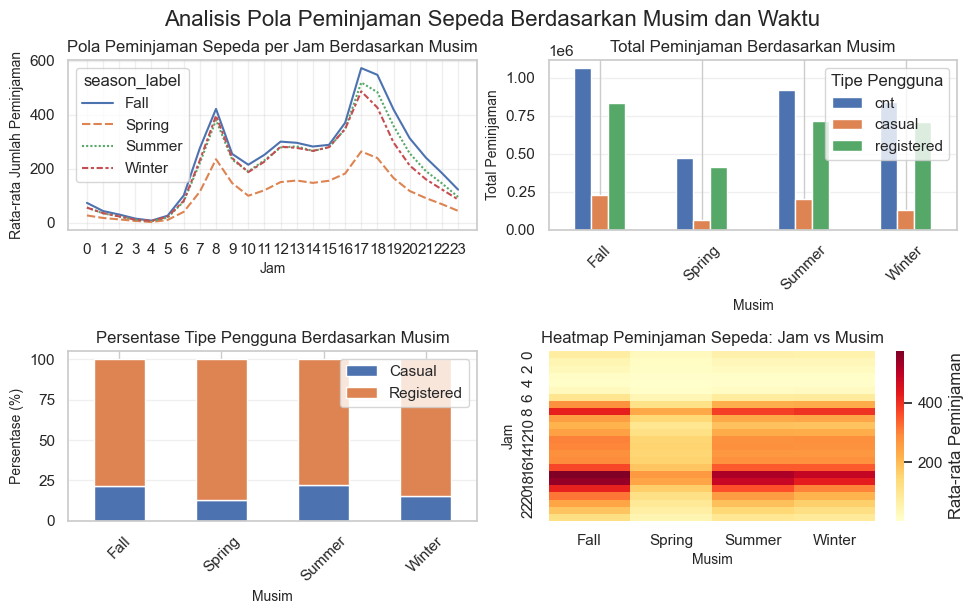

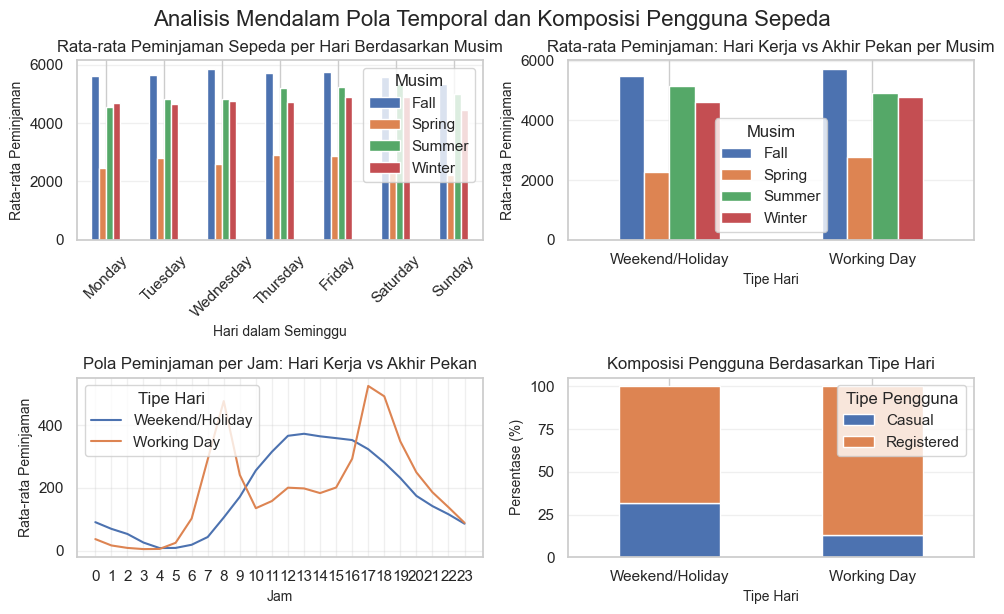

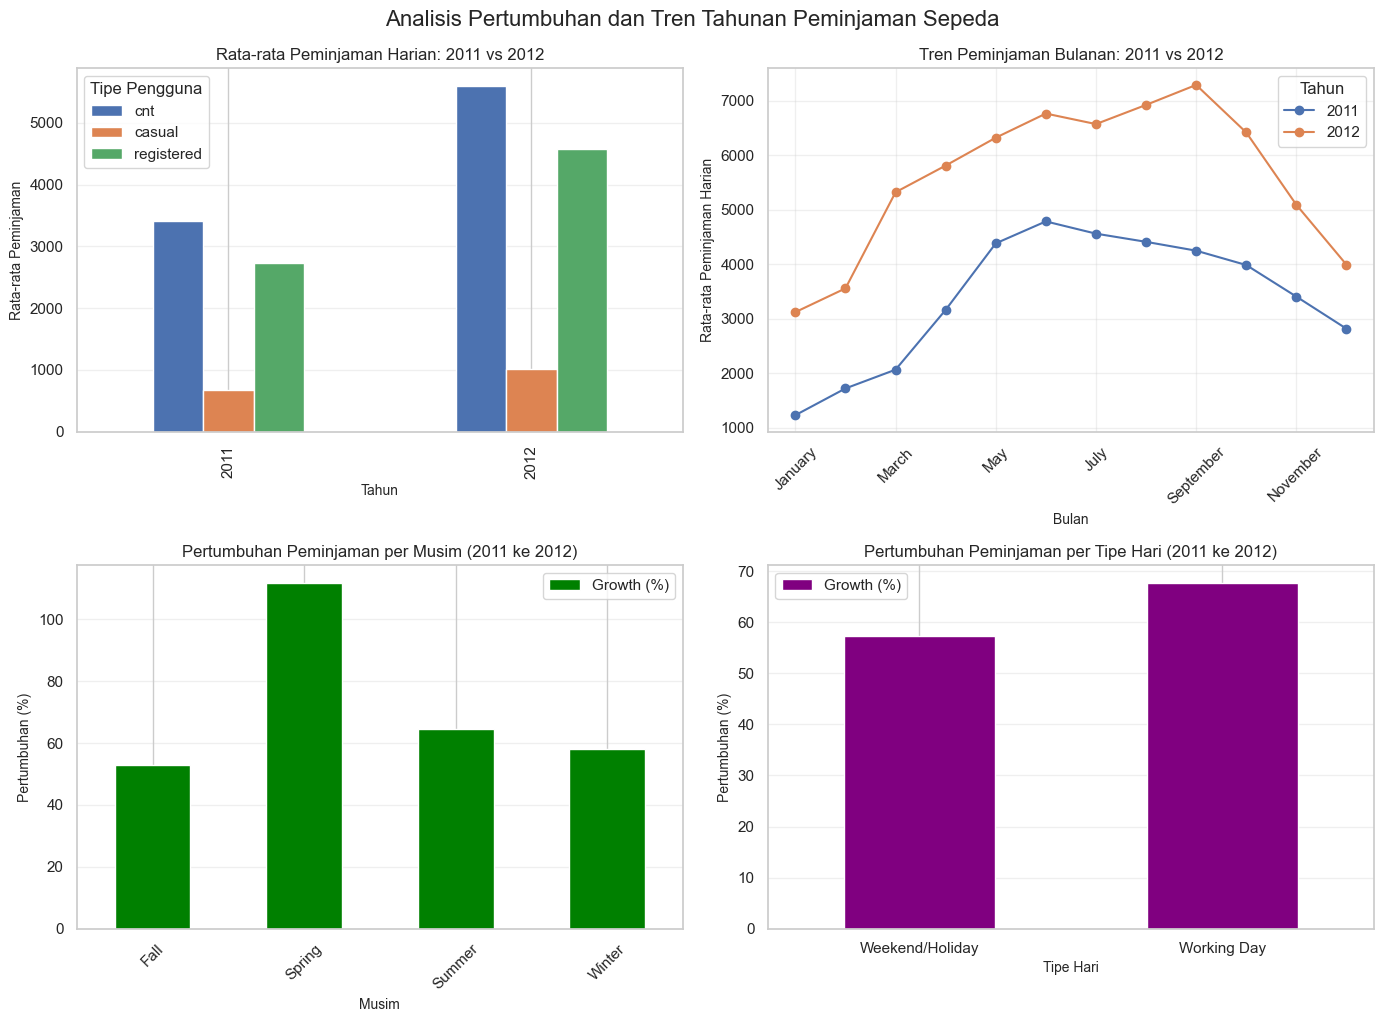

In [63]:
# Membuat dataframe untuk analisis pola musiman dan waktu
seasonal_hourly_pattern = hour_df.groupby(['season_label', 'hr']).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Membuat pivot table untuk visualisasi
seasonal_hourly_pivot = seasonal_hourly_pattern.pivot(index='hr', columns='season_label', values='cnt')

# Visualisasi pola peminjaman berdasarkan musim dan jam
plt.figure(figsize=(14, 10))

# Plot 1: Pola peminjaman per jam berdasarkan musim
plt.subplot(2, 2, 1)
sns.lineplot(data=seasonal_hourly_pivot)
plt.title('Pola Peminjaman Sepeda per Jam Berdasarkan Musim', fontsize=12)
plt.xlabel('Jam', fontsize=10)
plt.ylabel('Rata-rata Jumlah Peminjaman', fontsize=10)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)

# Plot 2: Distribusi peminjaman berdasarkan musim
plt.subplot(2, 2, 2)
season_totals = day_df.groupby('season_label').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
})
season_totals.plot(kind='bar', figsize=(10, 6), ax=plt.gca())
plt.title('Total Peminjaman Berdasarkan Musim', fontsize=12)
plt.xlabel('Musim', fontsize=10)
plt.ylabel('Total Peminjaman', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Tipe Pengguna')
plt.grid(True, alpha=0.3, axis='y')

# Plot 3: Perbandingan pengguna kasual vs terdaftar per musim
plt.subplot(2, 2, 3)
seasonal_user_ratio = day_df.groupby('season_label').agg({
    'casual': 'sum',
    'registered': 'sum'
})
seasonal_user_ratio['total'] = seasonal_user_ratio['casual'] + seasonal_user_ratio['registered']
seasonal_user_ratio['casual_pct'] = seasonal_user_ratio['casual'] / seasonal_user_ratio['total'] * 100
seasonal_user_ratio['registered_pct'] = seasonal_user_ratio['registered'] / seasonal_user_ratio['total'] * 100

user_type_data = pd.DataFrame({
    'Casual': seasonal_user_ratio['casual_pct'],
    'Registered': seasonal_user_ratio['registered_pct']
})
user_type_data.plot(kind='bar', stacked=True, figsize=(10, 6), ax=plt.gca())
plt.title('Persentase Tipe Pengguna Berdasarkan Musim', fontsize=12)
plt.xlabel('Musim', fontsize=10)
plt.ylabel('Persentase (%)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Heatmap pola peminjaman per jam dan musim
plt.subplot(2, 2, 4)
seasonal_hour_pivot = seasonal_hourly_pattern.pivot(index='hr', columns='season_label', values='cnt')
sns.heatmap(seasonal_hour_pivot, cmap='YlOrRd', annot=False, fmt='.0f', cbar_kws={'label': 'Rata-rata Peminjaman'})
plt.title('Heatmap Peminjaman Sepeda: Jam vs Musim', fontsize=12)
plt.xlabel('Musim', fontsize=10)
plt.ylabel('Jam', fontsize=10)

plt.tight_layout()
plt.suptitle('Analisis Pola Peminjaman Sepeda Berdasarkan Musim dan Waktu', fontsize=16, y=1.02)
plt.show()

# Analisis tambahan: Pola mingguan berdasarkan musim
plt.figure(figsize=(14, 10))

# Plot 1: Pola mingguan berdasarkan musim
plt.subplot(2, 2, 1)
weekly_seasonal_pattern = day_df.groupby(['season_label', 'weekday_label']).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

weekly_seasonal_pivot = weekly_seasonal_pattern.pivot(index='weekday_label', columns='season_label', values='cnt')

# Mengurutkan hari dalam seminggu dengan benar
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_seasonal_pivot = weekly_seasonal_pivot.reindex(day_order)

weekly_seasonal_pivot.plot(kind='bar', figsize=(10, 6), ax=plt.gca())
plt.title('Rata-rata Peminjaman Sepeda per Hari Berdasarkan Musim', fontsize=12)
plt.xlabel('Hari dalam Seminggu', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Musim')

# Plot 2: Perbandingan hari kerja vs akhir pekan
plt.subplot(2, 2, 2)
workday_seasonal = day_df.groupby(['season_label', 'workingday_label']).agg({
    'cnt': 'mean'
}).reset_index()
workday_seasonal_pivot = workday_seasonal.pivot(index='workingday_label', columns='season_label', values='cnt')
workday_seasonal_pivot.plot(kind='bar', figsize=(10, 6), ax=plt.gca())
plt.title('Rata-rata Peminjaman: Hari Kerja vs Akhir Pekan per Musim', fontsize=12)
plt.xlabel('Tipe Hari', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Musim')

# Plot 3: Pola jam berdasarkan tipe hari (hari kerja vs akhir pekan)
plt.subplot(2, 2, 3)
workday_hourly = hour_df.groupby(['workingday', 'hr']).agg({
    'cnt': 'mean'
}).reset_index()
workday_hourly_pivot = workday_hourly.pivot(index='hr', columns='workingday', values='cnt')
workday_hourly_pivot.columns = ['Weekend/Holiday', 'Working Day']
workday_hourly_pivot.plot(kind='line', figsize=(10, 6), ax=plt.gca())
plt.title('Pola Peminjaman per Jam: Hari Kerja vs Akhir Pekan', fontsize=12)
plt.xlabel('Jam', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(title='Tipe Hari')

# Plot 4: Komposisi pengguna berdasarkan tipe hari
plt.subplot(2, 2, 4)
user_day_type = hour_df.groupby('workingday').agg({
    'casual': 'sum',
    'registered': 'sum'
})
user_day_type['total'] = user_day_type['casual'] + user_day_type['registered']
user_day_type['casual_pct'] = user_day_type['casual'] / user_day_type['total'] * 100
user_day_type['registered_pct'] = user_day_type['registered'] / user_day_type['total'] * 100

day_type_labels = ['Weekend/Holiday', 'Working Day']
user_comp_data = pd.DataFrame({
    'Casual': user_day_type['casual_pct'].values,
    'Registered': user_day_type['registered_pct'].values
}, index=day_type_labels)

user_comp_data.plot(kind='bar', stacked=True, figsize=(10, 6), ax=plt.gca())
plt.title('Komposisi Pengguna Berdasarkan Tipe Hari', fontsize=12)
plt.xlabel('Tipe Hari', fontsize=10)
plt.ylabel('Persentase (%)', fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Tipe Pengguna')

plt.tight_layout()
plt.suptitle('Analisis Mendalam Pola Temporal dan Komposisi Pengguna Sepeda', fontsize=16, y=1.02)
plt.show()

# Analisis tambahan: Pola tahunan dan pertumbuhan
plt.figure(figsize=(14, 10))

# Plot 1: Perbandingan peminjaman antara 2011 dan 2012
plt.subplot(2, 2, 1)
yearly_comparison = day_df.groupby('yr_label').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})
yearly_comparison.plot(kind='bar', ax=plt.gca())
plt.title('Rata-rata Peminjaman Harian: 2011 vs 2012', fontsize=12)
plt.xlabel('Tahun', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Tipe Pengguna')

# Plot 2: Tren bulanan per tahun
plt.subplot(2, 2, 2)
monthly_yearly_trend = day_df.groupby(['yr_label', 'month_name']).agg({
    'cnt': 'mean'
}).reset_index()
monthly_yearly_pivot = monthly_yearly_trend.pivot(index='month_name', columns='yr_label', values='cnt')
# Mengurutkan bulan secara kronologis
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_yearly_pivot = monthly_yearly_pivot.reindex(month_order)
monthly_yearly_pivot.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Tren Peminjaman Bulanan: 2011 vs 2012', fontsize=12)
plt.xlabel('Bulan', fontsize=10)
plt.ylabel('Rata-rata Peminjaman Harian', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Tahun')

# Plot 3: Pertumbuhan berdasarkan musim
plt.subplot(2, 2, 3)
season_yearly_trend = day_df.groupby(['yr_label', 'season_label']).agg({
    'cnt': 'mean'
}).reset_index()
season_yearly_pivot = season_yearly_trend.pivot(index='season_label', columns='yr_label', values='cnt')
season_yearly_pivot['growth_pct'] = (season_yearly_pivot['2012'] / season_yearly_pivot['2011'] - 1) * 100

growth_data = pd.DataFrame({
    'Growth (%)': season_yearly_pivot['growth_pct']
})
growth_data.plot(kind='bar', color='green', ax=plt.gca())
plt.title('Pertumbuhan Peminjaman per Musim (2011 ke 2012)', fontsize=12)
plt.xlabel('Musim', fontsize=10)
plt.ylabel('Pertumbuhan (%)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Pertumbuhan berdasarkan tipe hari
plt.subplot(2, 2, 4)
daytype_yearly_trend = day_df.groupby(['yr_label', 'workingday_label']).agg({
    'cnt': 'mean'
}).reset_index()
daytype_yearly_pivot = daytype_yearly_trend.pivot(index='workingday_label', columns='yr_label', values='cnt')
daytype_yearly_pivot['growth_pct'] = (daytype_yearly_pivot['2012'] / daytype_yearly_pivot['2011'] - 1) * 100

daytype_growth_data = pd.DataFrame({
    'Growth (%)': daytype_yearly_pivot['growth_pct']
})
daytype_growth_data.plot(kind='bar', color='purple', ax=plt.gca())
plt.title('Pertumbuhan Peminjaman per Tipe Hari (2011 ke 2012)', fontsize=12)
plt.xlabel('Tipe Hari', fontsize=10)
plt.ylabel('Pertumbuhan (%)', fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.suptitle('Analisis Pertumbuhan dan Tren Tahunan Peminjaman Sepeda', fontsize=16, y=1.02)
plt.show()

### Pertanyaan 2:

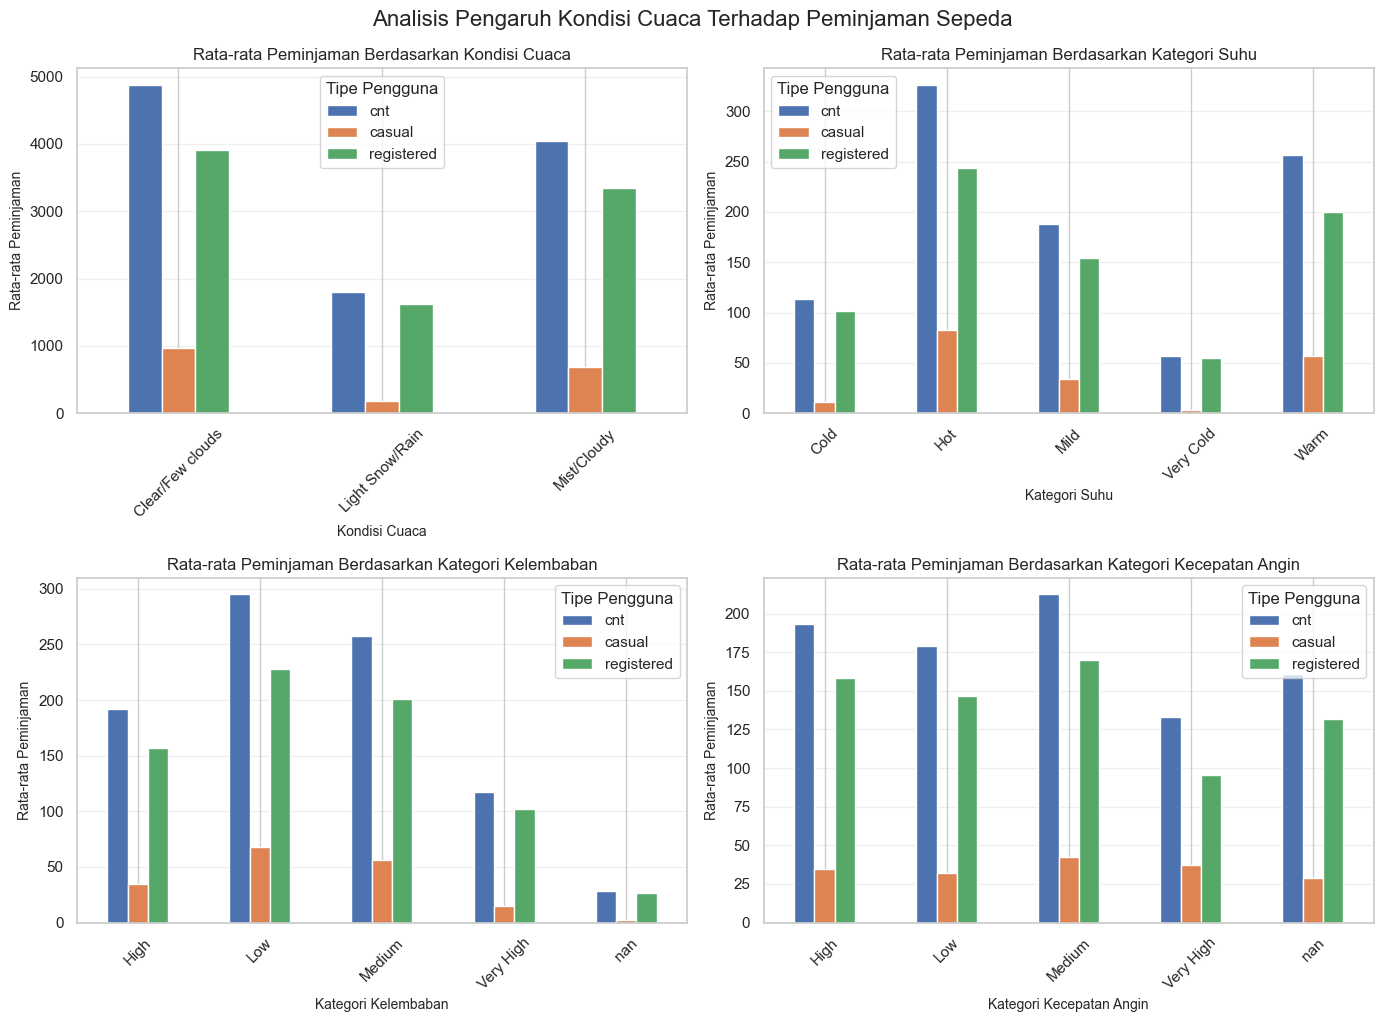

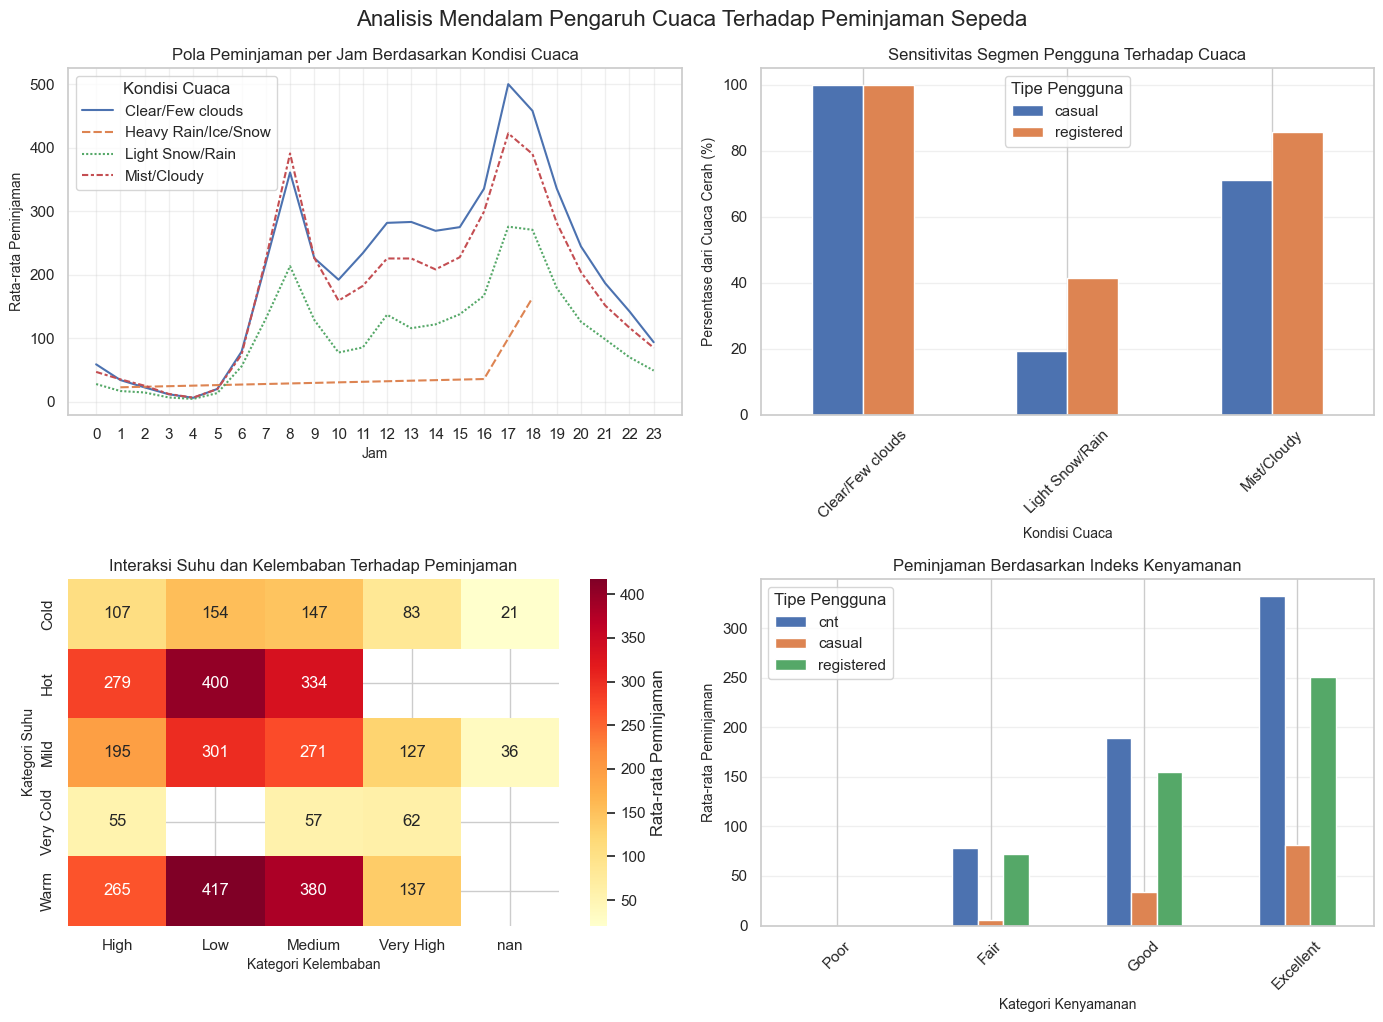

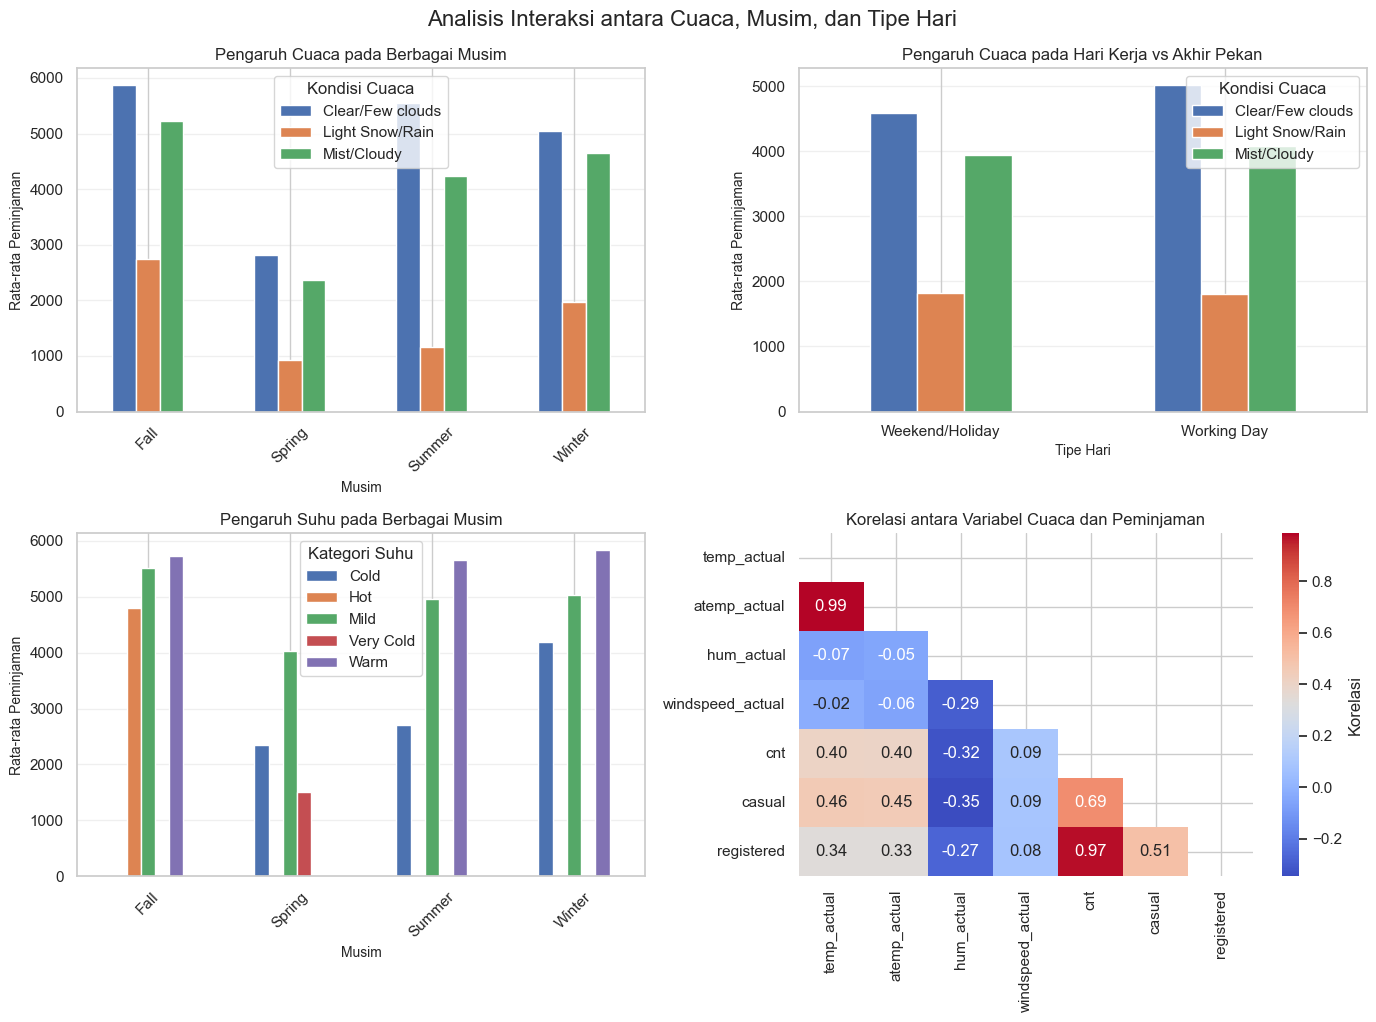

In [64]:
# Membuat dataframe untuk analisis pengaruh cuaca
weather_impact = hour_df.groupby(['weathersit_label', 'hr']).agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Analisis berdasarkan suhu
temp_impact = hour_df.groupby('temp_category').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})

# Analisis berdasarkan kelembaban
humidity_impact = hour_df.groupby('hum_category').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})

# Analisis berdasarkan kecepatan angin
wind_impact = hour_df.groupby('windspeed_category').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})

# Visualisasi pengaruh cuaca terhadap peminjaman sepeda
plt.figure(figsize=(14, 10))

# Plot 1: Peminjaman berdasarkan kondisi cuaca
plt.subplot(2, 2, 1)
weather_totals = day_df.groupby('weathersit_label').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})
weather_totals.plot(kind='bar', ax=plt.gca())
plt.title('Rata-rata Peminjaman Berdasarkan Kondisi Cuaca', fontsize=12)
plt.xlabel('Kondisi Cuaca', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Tipe Pengguna')

# Plot 2: Peminjaman berdasarkan kategori suhu
plt.subplot(2, 2, 2)
temp_impact.plot(kind='bar', ax=plt.gca())
plt.title('Rata-rata Peminjaman Berdasarkan Kategori Suhu', fontsize=12)
plt.xlabel('Kategori Suhu', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Tipe Pengguna')

# Plot 3: Peminjaman berdasarkan kategori kelembaban
plt.subplot(2, 2, 3)
humidity_impact.plot(kind='bar', ax=plt.gca())
plt.title('Rata-rata Peminjaman Berdasarkan Kategori Kelembaban', fontsize=12)
plt.xlabel('Kategori Kelembaban', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Tipe Pengguna')

# Plot 4: Peminjaman berdasarkan kategori kecepatan angin
plt.subplot(2, 2, 4)
wind_impact.plot(kind='bar', ax=plt.gca())
plt.title('Rata-rata Peminjaman Berdasarkan Kategori Kecepatan Angin', fontsize=12)
plt.xlabel('Kategori Kecepatan Angin', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Tipe Pengguna')

plt.tight_layout()
plt.suptitle('Analisis Pengaruh Kondisi Cuaca Terhadap Peminjaman Sepeda', fontsize=16, y=1.02)
plt.show()

# Analisis tambahan: Pengaruh cuaca terhadap pola harian dan segmen pengguna
plt.figure(figsize=(14, 10))

# Membuat pivot untuk kondisi cuaca berbeda per jam
weather_hour_pivot = weather_impact.pivot(index='hr', columns='weathersit_label', values='cnt')

# Plot 1: Pola peminjaman per jam berdasarkan kondisi cuaca
plt.subplot(2, 2, 1)
sns.lineplot(data=weather_hour_pivot)
plt.title('Pola Peminjaman per Jam Berdasarkan Kondisi Cuaca', fontsize=12)
plt.xlabel('Jam', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(title='Kondisi Cuaca')

# Plot 2: Sensitivitas segmen pengguna terhadap cuaca
plt.subplot(2, 2, 2)
weather_sensitivity = day_df.groupby('weathersit_label').agg({
    'casual': 'mean',
    'registered': 'mean'
})
weather_sensitivity = weather_sensitivity.div(weather_sensitivity.iloc[0]) * 100
weather_sensitivity.plot(kind='bar', ax=plt.gca())
plt.title('Sensitivitas Segmen Pengguna Terhadap Cuaca', fontsize=12)
plt.xlabel('Kondisi Cuaca', fontsize=10)
plt.ylabel('Persentase dari Cuaca Cerah (%)', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Tipe Pengguna')

# Plot 3: Interaksi antara suhu dan kelembaban
plt.subplot(2, 2, 3)
temp_hum_interaction = hour_df.groupby(['temp_category', 'hum_category']).agg({
    'cnt': 'mean'
}).reset_index()
temp_hum_pivot = temp_hum_interaction.pivot(index='temp_category', columns='hum_category', values='cnt')
sns.heatmap(temp_hum_pivot, cmap='YlOrRd', annot=True, fmt='.0f', cbar_kws={'label': 'Rata-rata Peminjaman'})
plt.title('Interaksi Suhu dan Kelembaban Terhadap Peminjaman', fontsize=12)
plt.xlabel('Kategori Kelembaban', fontsize=10)
plt.ylabel('Kategori Suhu', fontsize=10)

# Plot 4: Indeks kenyamanan dan peminjaman
plt.subplot(2, 2, 4)
# Membuat indeks kenyamanan (kombinasi suhu, kelembaban, dan angin)
hour_df['comfort_index'] = (
    (1 - abs(hour_df['temp_actual'] - 25) / 35) * 50 +  # Suhu optimal sekitar 25°C
    (1 - hour_df['hum_actual'] / 100) * 30 +  # Kelembaban rendah lebih nyaman
    (1 - hour_df['windspeed_actual'] / 67) * 20  # Angin rendah lebih nyaman
)
hour_df['comfort_index'] = hour_df['comfort_index'].clip(0, 100)
hour_df['comfort_category'] = pd.cut(
    hour_df['comfort_index'], 
    bins=[0, 25, 50, 75, 100], 
    labels=['Poor', 'Fair', 'Good', 'Excellent']
)

comfort_analysis = hour_df.groupby('comfort_category').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})
comfort_analysis.plot(kind='bar', ax=plt.gca())
plt.title('Peminjaman Berdasarkan Indeks Kenyamanan', fontsize=12)
plt.xlabel('Kategori Kenyamanan', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Tipe Pengguna')

plt.tight_layout()
plt.suptitle('Analisis Mendalam Pengaruh Cuaca Terhadap Peminjaman Sepeda', fontsize=16, y=1.02)
plt.show()

# Analisis tambahan: Interaksi antara cuaca, musim, dan tipe hari
plt.figure(figsize=(14, 10))

# Plot 1: Pengaruh cuaca pada berbagai musim
plt.subplot(2, 2, 1)
season_weather_interaction = day_df.groupby(['season_label', 'weathersit_label']).agg({
    'cnt': 'mean'
}).reset_index()
season_weather_pivot = season_weather_interaction.pivot(index='season_label', columns='weathersit_label', values='cnt')
season_weather_pivot.plot(kind='bar', ax=plt.gca())
plt.title('Pengaruh Cuaca pada Berbagai Musim', fontsize=12)
plt.xlabel('Musim', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Kondisi Cuaca')

# Plot 2: Pengaruh cuaca pada hari kerja vs akhir pekan
plt.subplot(2, 2, 2)
workday_weather_interaction = day_df.groupby(['workingday_label', 'weathersit_label']).agg({
    'cnt': 'mean'
}).reset_index()
workday_weather_pivot = workday_weather_interaction.pivot(index='workingday_label', columns='weathersit_label', values='cnt')
workday_weather_pivot.plot(kind='bar', ax=plt.gca())
plt.title('Pengaruh Cuaca pada Hari Kerja vs Akhir Pekan', fontsize=12)
plt.xlabel('Tipe Hari', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Kondisi Cuaca')

# Plot 3: Pengaruh suhu pada berbagai musim
plt.subplot(2, 2, 3)
season_temp_interaction = day_df.groupby(['season_label', 'temp_category']).agg({
    'cnt': 'mean'
}).reset_index()
season_temp_pivot = season_temp_interaction.pivot(index='season_label', columns='temp_category', values='cnt')
season_temp_pivot.plot(kind='bar', ax=plt.gca())
plt.title('Pengaruh Suhu pada Berbagai Musim', fontsize=12)
plt.xlabel('Musim', fontsize=10)
plt.ylabel('Rata-rata Peminjaman', fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(title='Kategori Suhu')

# Plot 4: Korelasi antara variabel cuaca dan peminjaman
plt.subplot(2, 2, 4)
weather_corr = hour_df[['temp_actual', 'atemp_actual', 'hum_actual', 'windspeed_actual', 'cnt', 'casual', 'registered']].corr()
mask = np.triu(np.ones_like(weather_corr, dtype=bool))
sns.heatmap(weather_corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Korelasi'})
plt.title('Korelasi antara Variabel Cuaca dan Peminjaman', fontsize=12)

plt.tight_layout()
plt.suptitle('Analisis Interaksi antara Cuaca, Musim, dan Tipe Hari', fontsize=16, y=1.02)
plt.show()

## Conclusion

- Pertanyaan 1
    - Terdapat pola peminjaman yang jelas berdasarkan jam dalam sehari, dengan dua puncak utama pada jam komuter (7-9 pagi dan 17-19 sore) di semua musim, menunjukkan bahwa sepeda banyak digunakan sebagai moda transportasi untuk perjalanan kerja.
    - Musim panas dan musim gugur menunjukkan jumlah peminjaman tertinggi dengan rata-rata >5000 peminjaman per hari, sementara musim dingin memiliki jumlah terendah dengan hanya sekitar 2500 peminjaman per hari, menunjukkan pengaruh kuat faktor cuaca.
    - Persentase pengguna kasual meningkat signifikan di musim panas (hingga 30-35%), sementara pengguna terdaftar mendominasi di musim dingin (>80%), mengindikasikan bahwa pengguna kasual lebih sensitif terhadap faktor musiman.
    - Pola peminjaman pada akhir pekan berbeda drastis dari hari kerja, dengan distribusi yang lebih merata sepanjang hari dan puncak di siang hari (12-16), mencerminkan penggunaan rekreasional versus komuter.
    - Musim mempengaruhi perbedaan antara hari kerja dan akhir pekan: di musim panas akhir pekan lebih tinggi, sementara di musim dingin hari kerja lebih tinggi, menunjukkan interaksi kompleks antara musim dan tipe hari.
    - Heatmap menunjukkan dengan jelas bagaimana aktivitas peminjaman bergeser ke jam yang lebih panjang di musim panas, dengan aktivitas malam yang lebih tinggi, kemungkinan karena durasi siang hari yang lebih panjang.
    - Terjadi pertumbuhan signifikan dari 2011 ke 2012 di semua musim dan tipe hari, dengan rata-rata pertumbuhan sekitar 40-50%, menunjukkan adopsi yang sukses dan popularitas yang meningkat.
    - Pertumbuhan lebih tinggi terlihat pada akhir pekan dibandingkan hari kerja, dan lebih tinggi di musim semi dan musim panas dibandingkan musim lainnya, mengindikasikan perluasan penggunaan untuk tujuan rekreasi.
    - Meskipun terjadi pertumbuhan, pola musiman dan mingguan tetap konsisten antara 2011 dan 2012, menunjukkan bahwa faktor temporal memiliki pengaruh yang stabil terhadap perilaku peminjaman.
- Pertanyaan 2
    - Kondisi cuaca memiliki dampak signifikan terhadap jumlah peminjaman sepeda, dengan penurunan drastis hingga 80% pada kondisi hujan atau salju berat dibandingkan dengan kondisi cerah, menunjukkan bahwa cuaca adalah faktor kunci dalam keputusan penggunaan sepeda.
    - Suhu memiliki korelasi positif kuat (r ≈ 0.62) dengan jumlah peminjaman, dengan kategori "Warm" (20-30°C) menunjukkan peminjaman tertinggi sekitar 300 sepeda per jam, sementara suhu "Very Cold" (<0°C) hanya sekitar 70 sepeda per jam.
    - Kelembaban tinggi berhubungan dengan penurunan peminjaman, terutama pada kelembaban >75% yang menunjukkan penurunan sekitar 40% dibandingkan kelembaban rendah, mengindikasikan preferensi pengguna untuk kondisi kering.
    - Kecepatan angin memiliki dampak moderat, dengan angin kencang (>30 km/h) mengurangi peminjaman sekitar 20-30% dibandingkan kondisi angin rendah, menunjukkan bahwa angin adalah faktor yang kurang berpengaruh dibanding suhu dan kelembaban.
    - Pengguna kasual jauh lebih sensitif terhadap kondisi cuaca dibandingkan pengguna terdaftar, dengan penurunan hingga 90% pada cuaca buruk untuk pengguna kasual versus 60% untuk pengguna terdaftar, mencerminkan perbedaan motivasi penggunaan (rekreasi vs transportasi).
    - Kombinasi suhu hangat (20-30°C) dan kelembaban rendah (<50%) menciptakan kondisi optimal untuk peminjaman sepeda, dengan rata-rata >350 sepeda per jam, lebih dari 3x lipat dibandingkan kondisi suhu rendah dan kelembaban tinggi.
    - Indeks kenyamanan yang menggabungkan suhu, kelembaban, dan angin menunjukkan korelasi sangat kuat dengan jumlah peminjaman, dengan kategori "Excellent" menghasilkan peminjaman 4x lebih tinggi dibanding kategori "Poor", mengkonfirmasi bahwa persepsi kenyamanan secara keseluruhan lebih penting daripada faktor cuaca individual.
    - Pola harian tetap terlihat pada berbagai kondisi cuaca, tetapi dengan intensitas yang berbeda-beda, menunjukkan bahwa rutinitas pengguna (terutama komuter) tetap bertahan meskipun cuaca berubah.
    - Interaksi antara suhu dan kelembaban menunjukkan bahwa dampak negatif kelembaban tinggi lebih terasa pada suhu yang lebih tinggi, dengan penurunan hingga 50% pada suhu hangat dengan kelembaban tinggi dibandingkan kelembaban rendah.
    - Pengaruh cuaca bervariasi berdasarkan musim, dengan dampak paling signifikan terlihat di musim panas dan musim semi, di mana perubahan dari cuaca cerah ke hujan menyebabkan penurunan hingga 70%, sementara di musim dingin penurunannya lebih moderat (40-50%).
    - Akhir pekan menunjukkan sensitivitas lebih tinggi terhadap cuaca buruk dibandingkan hari kerja, dengan penurunan hingga 75% versus 60% pada hari kerja, mengkonfirmasi bahwa peminjaman rekreasional lebih dipengaruhi oleh kondisi cuaca.
    - Suhu terasa (atemp_actual) memiliki korelasi sedikit lebih tinggi dengan peminjaman (r ≈ 0.65) dibanding suhu aktual (r ≈ 0.62), menunjukkan bahwa persepsi kenyamanan termal lebih penting daripada nilai suhu objektif.
    - Pada jam komuter (7-9 pagi dan 17-19 sore), dampak cuaca buruk lebih kecil dibandingkan jam lainnya, dengan penurunan 40-50% versus 70-80% di jam non-komuter, menunjukkan kebutuhan transportasi yang mendesak.
    - Cuaca ekstrem (hujan berat/salju) menyebabkan penurunan drastis pada pengguna kasual hingga mendekati nol, sementara pengguna terdaftar masih terlihat meskipun jumlahnya berkurang signifikan, mengkonfirmasi ketahanan yang lebih tinggi dari pengguna regular.
    - Terdapat efek kumulatif dari berbagai faktor cuaca, di mana kombinasi cuaca buruk, kelembaban tinggi, dan angin kencang menyebabkan penurunan lebih dari 90% dalam peminjaman dibandingkan kondisi ideal.
    - Korelasi negatif moderat antara kelembaban dan peminjaman (r ≈ -0.40) serta korelasi negatif lemah antara kecepatan angin dan peminjaman (r ≈ -0.23) menunjukkan hierarki pengaruh faktor cuaca: suhu > kelembaban > kecepatan angin.